In [3]:
# Importing Python Libraries

import pm4py
import pandas as pd
import os
import pm4py

from pm4py.objects.petri.importer import importer as pnml_importer

C:\Users\Ahmed Fazal\anaconda3\lib\site-packages\pm4py\objects\petri\__init__.py:19: UserWarning: please use the pm4py.objects.petri_net package instead.
  warnings.warn('please use the pm4py.objects.petri_net package instead.')
C:\Users\Ahmed Fazal\anaconda3\lib\site-packages\pm4py\objects\petri\obj.py:19: UserWarning: pm4py.objects.petri.obj is deprecated. Please use the class pm4py.objects.petri_net.obj instead.
  warnings.warn("pm4py.objects.petri.obj is deprecated. Please use the class pm4py.objects.petri_net.obj instead.")
C:\Users\Ahmed Fazal\anaconda3\lib\site-packages\pm4py\objects\petri\exporter\__init__.py:21: UserWarning: please use the pm4py.objects.petri_net.exporter package instead.
  warnings.warn('please use the pm4py.objects.petri_net.exporter package instead.')
C:\Users\Ahmed Fazal\anaconda3\lib\site-packages\pm4py\objects\petri\importer\__init__.py:21: UserWarning: please use the pm4py.objects.petri_net.importer package instead.
  warnings.warn('please use the pm4py

In [4]:
# Importing the PNML file as a Petri net

process_model, initial_marking, final_marking = pnml_importer.apply("C:/Users/Ahmed Fazal/Downloads/PN_IM pnml file.pnml")

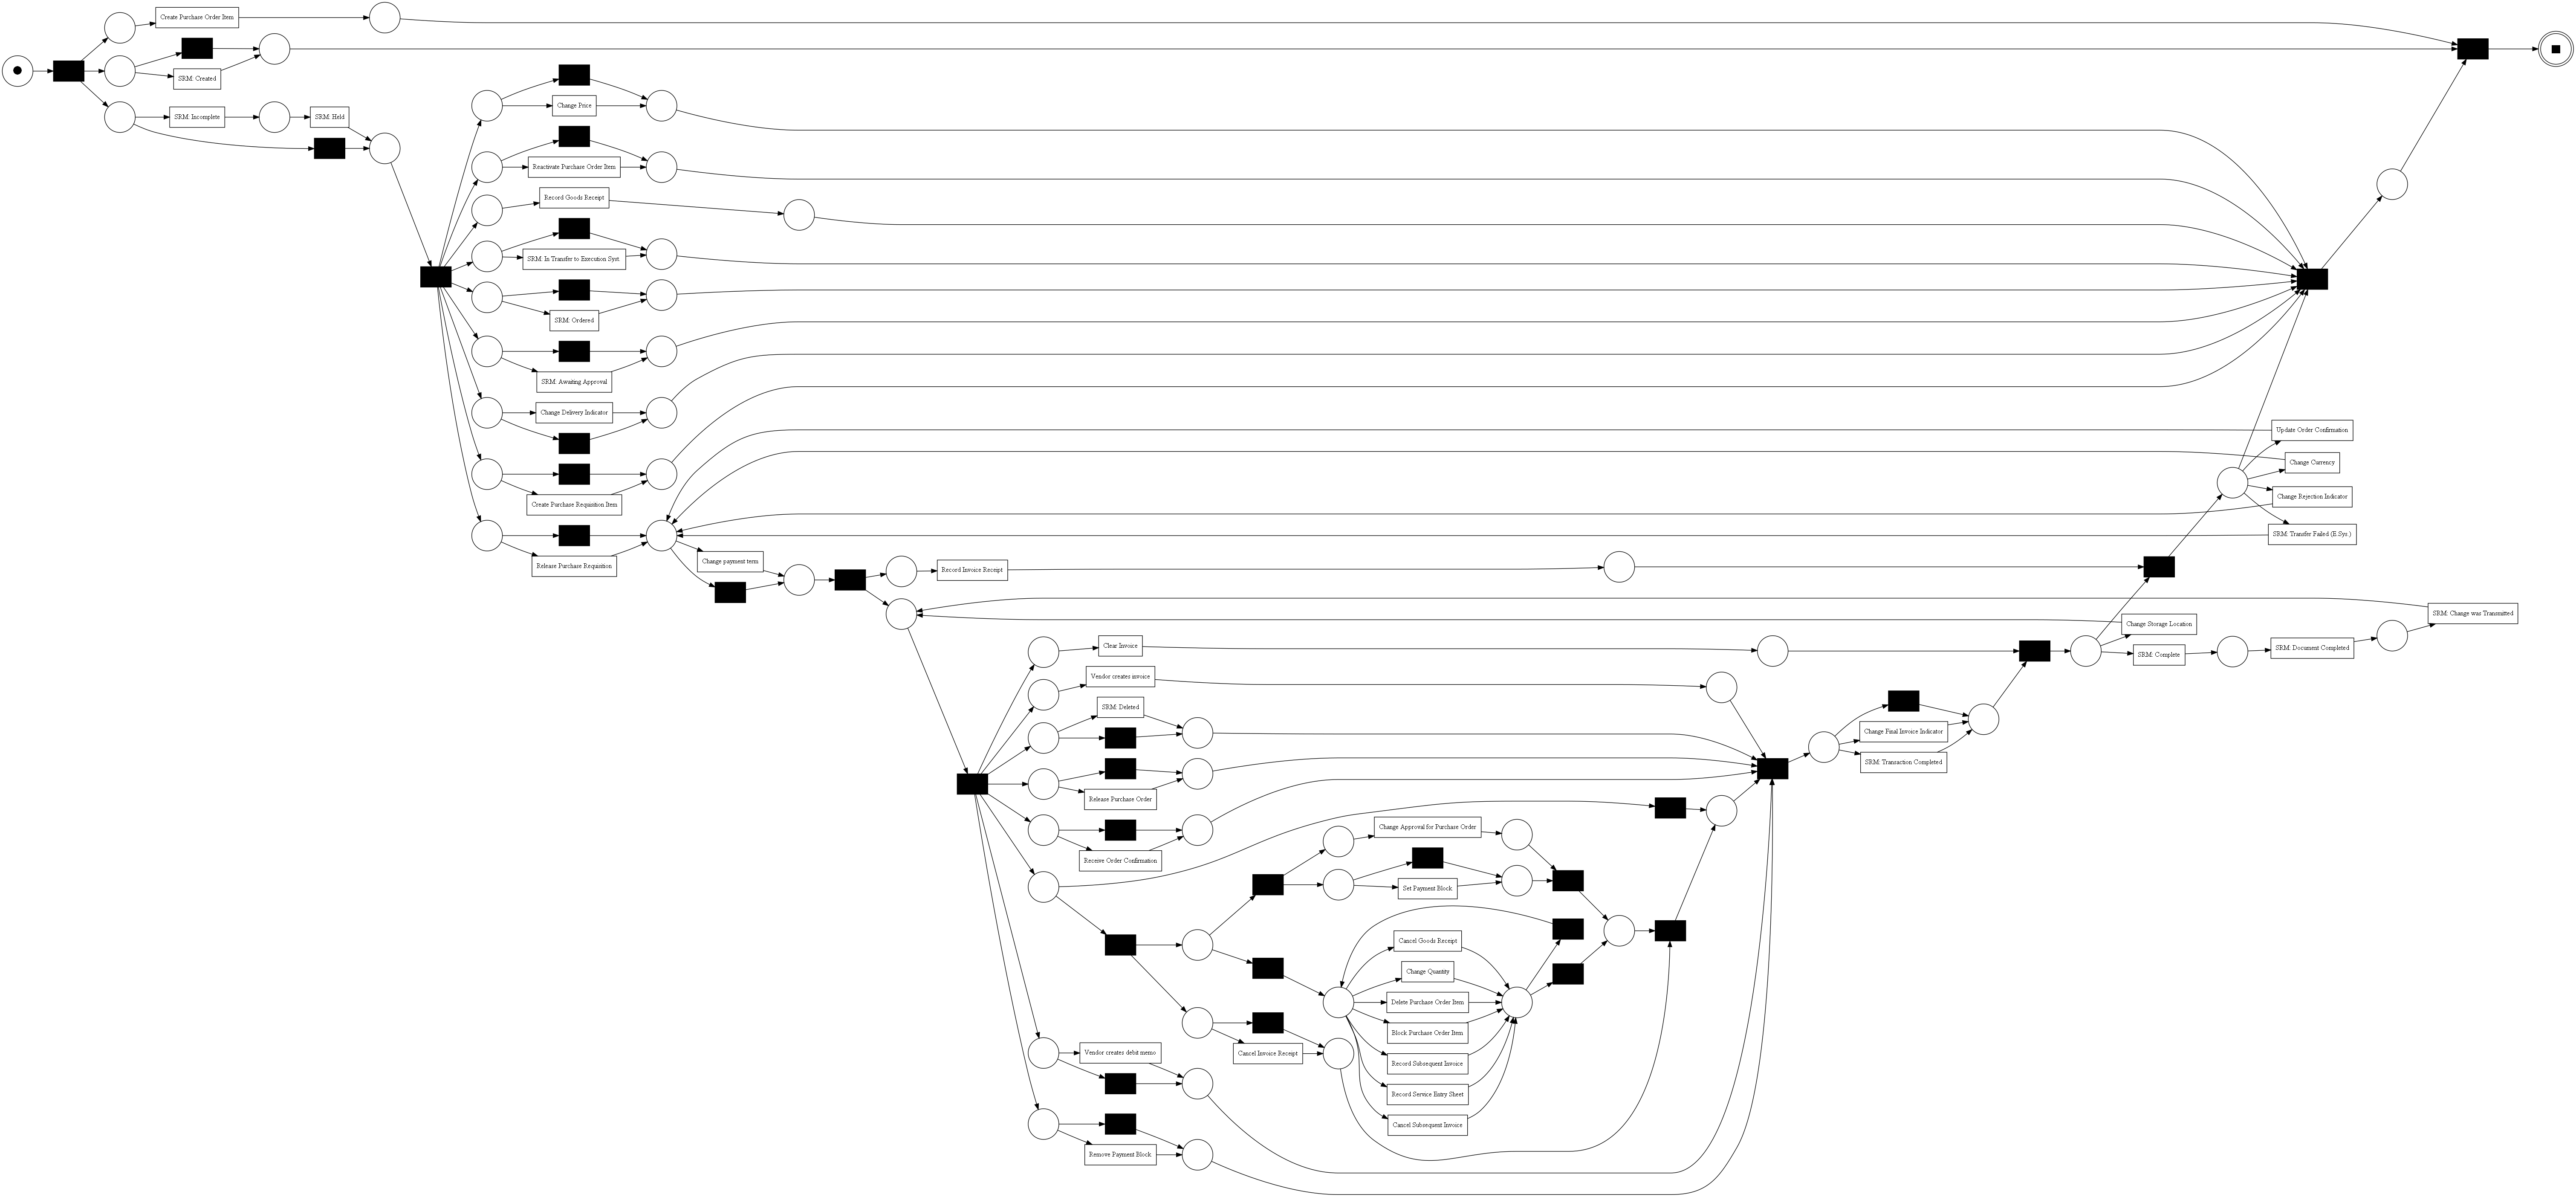

places: [ n1, n10, n11, n12, n13, n14, n15, n16, n17, n18, n19, n2, n20, n21, n22, n23, n24, n25, n26, n27, n28, n29, n3, n30, n31, n32, n33, n34, n35, n36, n37, n38, n39, n4, n40, n41, n42, n43, n44, n45, n46, n47, n48, n49, n5, n50, n51, n52, n53, n54, n55, n56, n57, n58, n59, n6, n60, n61, n62, n63, n64, n7, n8, n9 ]
transitions: [ (n100, None), (n101, 'Vendor creates invoice'), (n102, None), (n103, 'SRM: Deleted'), (n104, None), (n105, 'Release Purchase Order'), (n106, None), (n107, 'Receive Order Confirmation'), (n108, None), (n109, None), (n110, None), (n111, None), (n112, 'Record Service Entry Sheet'), (n113, 'Cancel Goods Receipt'), (n114, 'Change Quantity'), (n115, 'Delete Purchase Order Item'), (n116, 'Block Purchase Order Item'), (n117, 'Record Subsequent Invoice'), (n118, 'Cancel Subsequent Invoice'), (n119, None), (n120, None), (n121, None), (n122, None), (n123, 'Change Approval for Purchase Order'), (n124, None), (n125, 'Set Payment Block'), (n126, None), (n127, 'Cancel I

In [5]:
#  Visualizing the process model by running process instance

from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(process_model, initial_marking, final_marking)
pn_visualizer.view(gviz)
print(process_model)

In [6]:
# Defining place, transition and arc of a petrinet with respect to process model

places = process_model.places
transitions = process_model.transitions
arcs = process_model.arcs

In [8]:
# Importing the BPI_Challenge event log in XES format

from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('C:/Users/Ahmed Fazal/Downloads/BPI_Challenge_2019.xes')

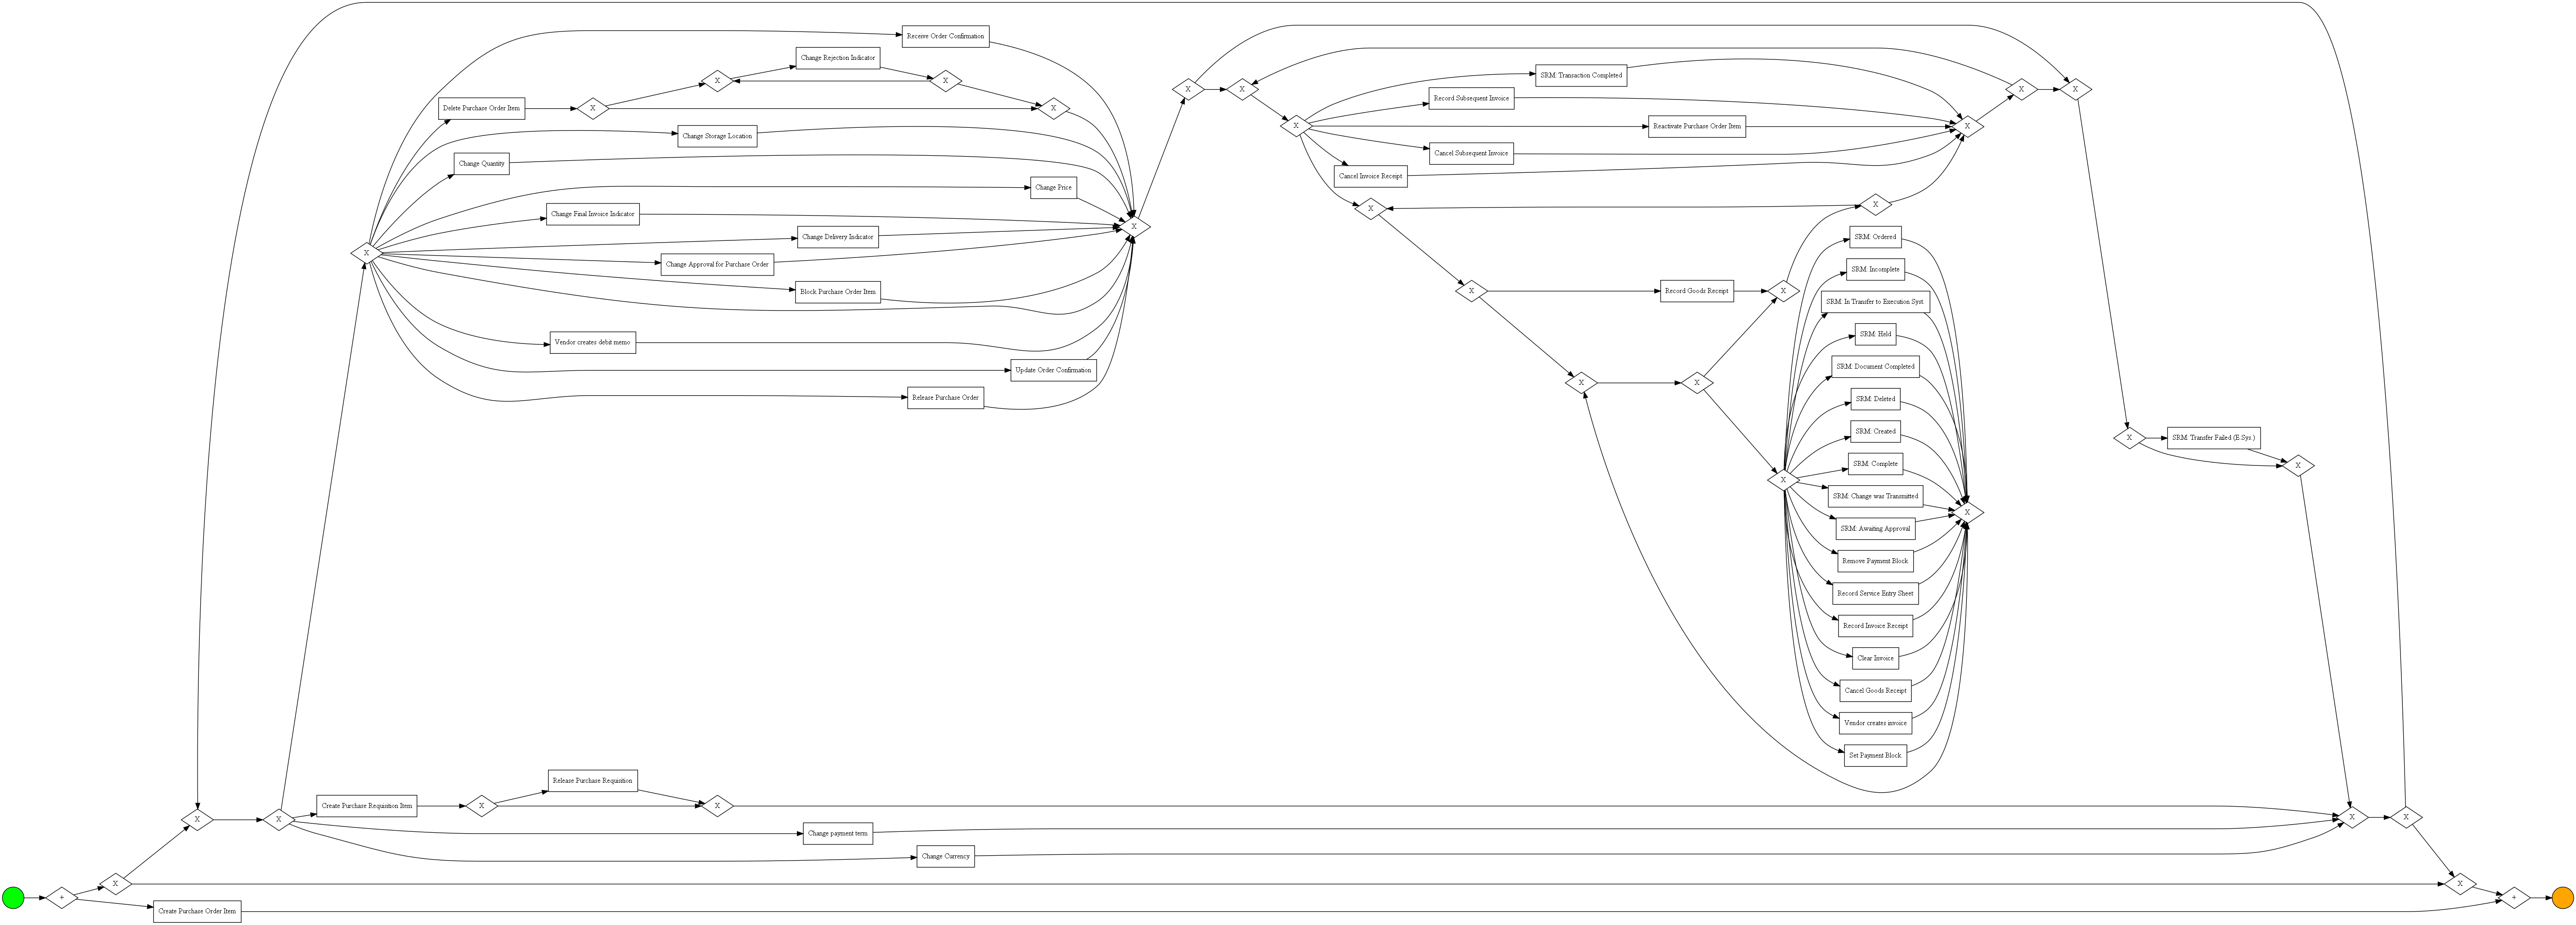

In [9]:
# Discovering BPMN model by conversion from process tree to BPMN

process_tree = pm4py.discover_process_tree_inductive(log)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

In [10]:
# Fetching the events from the log file

log_events=[]
for i in range(1,33):
  event_list=[]
  for j in range(0,len(log[i])):
    event_list.append(log[i][j]['concept:name'])
  log_events.append(event_list)

In [11]:
# Number of events in the log

len(log_events)

32

In [12]:
log_events[0]

['SRM: Created',
 'SRM: Complete',
 'SRM: Awaiting Approval',
 'SRM: Document Completed',
 'SRM: Ordered',
 'SRM: In Transfer to Execution Syst.',
 'SRM: Change was Transmitted',
 'Create Purchase Order Item',
 'Vendor creates invoice',
 'Record Goods Receipt',
 'Record Service Entry Sheet',
 'Record Invoice Receipt',
 'Clear Invoice',
 'SRM: In Transfer to Execution Syst.',
 'SRM: Transfer Failed (E.Sys.)']

In [102]:
# Implementing N-grams for the business process model 

import nltk #importing natural language toolkit

result=[]

n_gram_val = []
nexT_event = []
prob = []
predict_event = []

# Defining function for process prediction and passing process model and log file as parameters

def calculating_n_grams(event_list, n, log_events):
    
    predict=[]
  
    for i in range(n):
        
        if (n > 0):
            
            n_grams=nltk.ngrams(event_list,n)
            
            print(n_grams)
            for seq in list(n_grams):
            
            
        
                n_element = seq[len(seq)-1]
        
        for i in range(len(log_events)):
            
      
            if set(seq).issubset(log_events[i]) == True:
            
        
                next_event=(log_events[i].index(n_element)+1) # Getting next possible tasks from current task

                predicted_event=log_events[i][next_event]
          
                predict.append(predicted_event) 
            
                #print(predict, " predict ")

            occured_events = dict((x,predict.count(x)) for x in set(predict)) #dictionary to count occurance of events
      
        for k, v in occured_events.items():
            
            
            print(n, " -- " ,k, " -- ", v)
            if n<0:
                 break
                    
            else:
                
                n_gram_val.append(n)
                
                nexT_event.append(k)
                
                prob.append(v / sum(occured_events.values()))
                
                predict_event.append(max(predict, key=predict.count))
                
                
                result.append([n,k,(v / sum(occured_events.values())),(max(predict, key=predict.count))])
  
            n -= 1 



# Enter the number of process for prediction
n_value = input("Enter the desired N value")
n_value = int(n_value)



event_list = ['SRM: Created',
  'SRM: Complete',
  'SRM: Awaiting Approval',
  'SRM: Document Completed'
  ]



calculating_n_grams(event_list, n_value ,log_events) #running the n-gram function for prediction

# Final probabilities of the events from the event log
df = pd.DataFrame(result, columns=['N_value','Next_events','Probability','predicted event'])



Enter the desired N value3
<generator object ngrams at 0x0000015CBC999F90>
3  --  SRM: In Transfer to Execution Syst.  --  24
2  --  SRM: Ordered  --  8
<generator object ngrams at 0x0000015CBC999200>
1  --  SRM: In Transfer to Execution Syst.  --  48
0  --  SRM: Ordered  --  16
-1  --  SRM: In Transfer to Execution Syst.  --  72


In [103]:
n_gram_val

[3, 2, 1, 0]

In [78]:
prob

[0.75, 0.25, 0.75, 0.25]

In [59]:
df.set_index('N_value', inplace=True)

In [60]:
df

,Next_events,Probability,predicted event
N_value,,,
3,SRM: In Transfer to Execution Syst.,0.75,SRM: In Transfer to Execution Syst.
2,SRM: Ordered,0.25,SRM: In Transfer to Execution Syst.
1,SRM: In Transfer to Execution Syst.,0.75,SRM: In Transfer to Execution Syst.
0,SRM: Ordered,0.25,SRM: In Transfer to Execution Syst.


In [15]:
type(result)

list


# FINAL RESULT

In [87]:
spa = pd.pivot_table(df, index=["N_value"],columns=["predicted event","Next_events"])

In [92]:
spa

Probability             
predicted event SRM: In Transfer to Execution Syst.             
Next_events     SRM: In Transfer to Execution Syst. SRM: Ordered
N_value                                                         
0                                               NaN         0.25
1                                              0.75          NaN
2                                               NaN         0.25
3                                              0.75          NaN

In [100]:
spa = spa.sort_values('N_value',axis=0, ascending=False)

In [101]:
spa

Probability             
predicted event SRM: In Transfer to Execution Syst.             
Next_events     SRM: In Transfer to Execution Syst. SRM: Ordered
N_value                                                         
3                                              0.75          NaN
2                                               NaN         0.25
1                                              0.75          NaN
0                                               NaN         0.25